<a href="https://colab.research.google.com/github/fazatra/PCVK_Genap_2023/blob/master/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import beberapa library berikut yang akan digunakan selama uji coba praktikum

In [3]:
!pip install pytesseract

In [4]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan

threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan diatas.

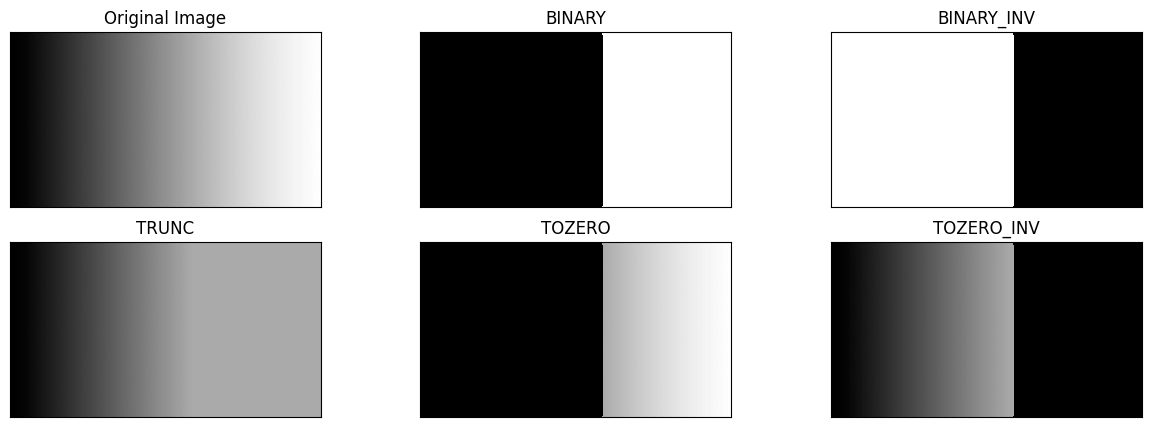

In [5]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv2.imread(filename)
thresh1 = cv2.imread(filename)
thresh2 = cv2.imread(filename)
thresh3 = cv2.imread(filename)
thresh4 = cv2.imread(filename)
thresh5 = cv2.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255 #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1 #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0 #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0 #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu's, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu's dengan global threshold biasa)

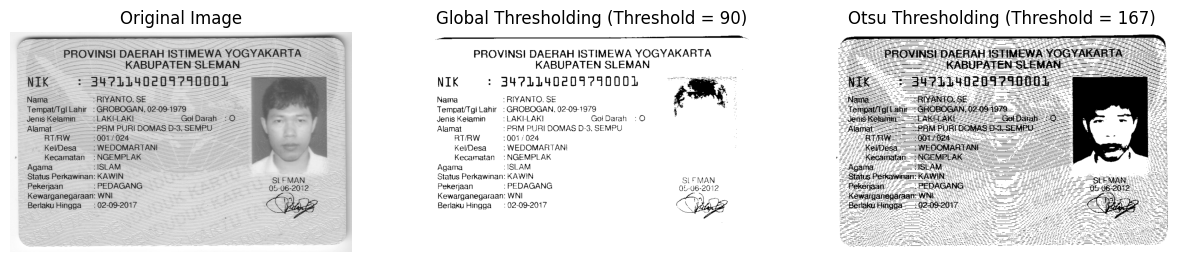

In [6]:
def otsu_thresholding(image):
    # Menghitung histogram gambar
    hist = cv2.calcHist([image], [0], None, [256], [0,256])
    hist_norm = hist.ravel() / hist.max()

    Q = hist_norm.cumsum()

    bins = np.arange(256)

    fn_min = np.inf
    thresh = -1

    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])
        q1, q2 = Q[i], Q[255] - Q[i]
        if q1 == 0 or q2 == 0:
            continue

        b1, b2 = np.hsplit(bins, [i])

        # Menghitung varian di setiap threshold
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2

        # Menghitung fungsi objektif untuk Otsu
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i

    return thresh

def global_thresholding(image, threshold):
    ret, global_thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return global_thresh

# Baca gambar
image_path = '/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png'
img = cv2.imread(image_path, 0)  # Membaca gambar dalam skala keabuan

# Menentukan nilai threshold untuk global thresholding
global_thresh_value = 90

# Menggunakan Otsu's Thresholding
otsu_threshold = otsu_thresholding(img)
ret, otsu = cv2.threshold(img, otsu_threshold, 255, cv2.THRESH_BINARY)

# Melakukan Global Thresholding
global_img = global_thresholding(img, global_thresh_value)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_img, cmap='gray')
plt.title('Global Thresholding (Threshold = ' + str(global_thresh_value) + ')')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu, cmap='gray')
plt.title('Otsu Thresholding (Threshold = ' + str(otsu_threshold) + ')')
plt.axis('off')

plt.show()

Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

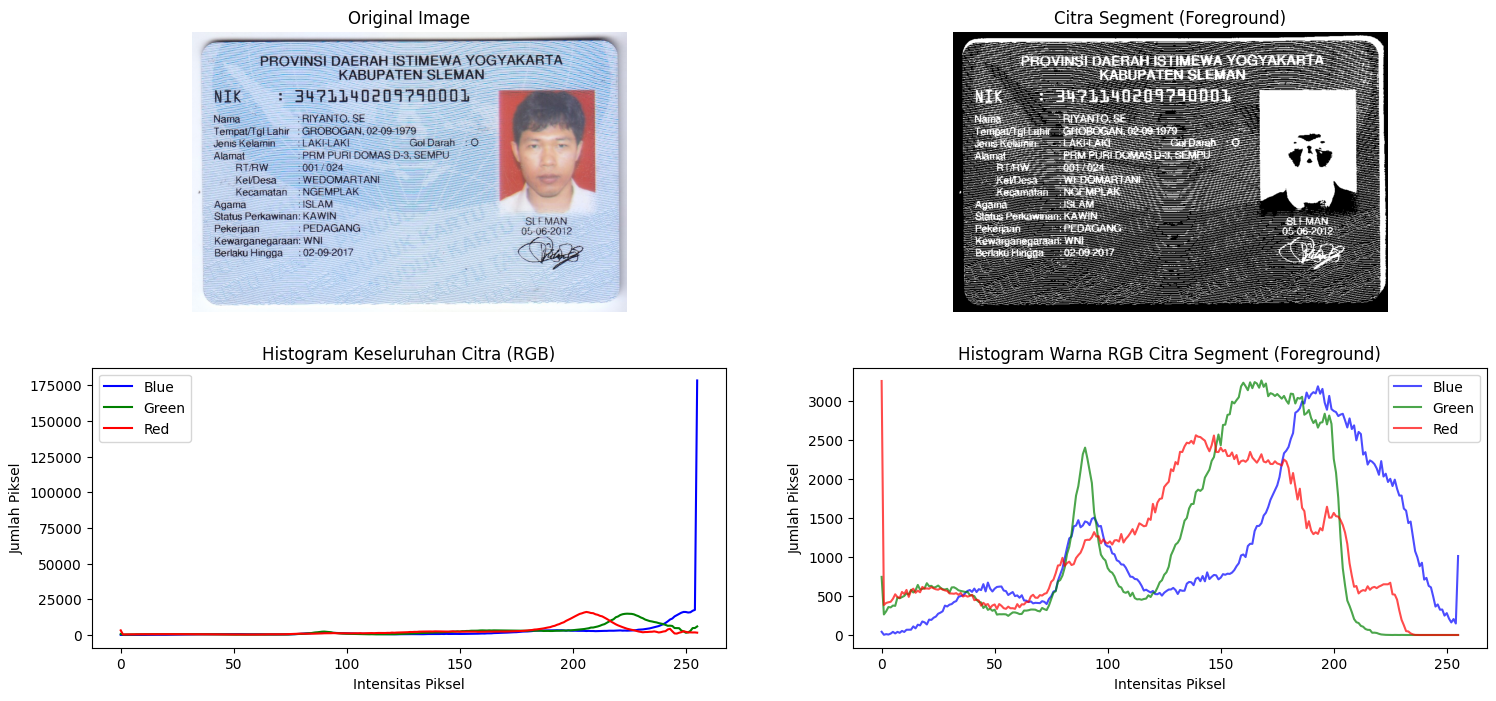

In [7]:
# Baca gambar
image_path = '/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png'
img = cv2.imread(image_path)

# Konversi ke citra keabuan
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Lakukan segmentasi (contoh: global thresholding)
ret, thresholded = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
foreground = cv2.bitwise_not(thresholded)

# Pisahkan saluran warna (BGR)
b, g, r = cv2.split(img)

# Hitung histogram untuk setiap saluran warna pada citra keseluruhan
hist_full_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_full_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_full_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Hitung histogram untuk setiap saluran warna pada citra segmentasi
hist_segmented_b = cv2.calcHist([b], [0], foreground, [256], [0, 256])
hist_segmented_g = cv2.calcHist([g], [0], foreground, [256], [0, 256])
hist_segmented_r = cv2.calcHist([r], [0], foreground, [256], [0, 256])

plt.figure(figsize=(18, 8))

# Tampilkan gambar asli
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Tampilkan citra segment (foreground)
plt.subplot(2, 2, 2)
plt.imshow(foreground, cmap='gray')
plt.title('Citra Segment (Foreground)')
plt.axis('off')

# Tampilkan histogram untuk keseluruhan citra (RGB)
plt.subplot(2, 2, 3)
plt.plot(hist_full_b, color='blue', label='Blue')
plt.plot(hist_full_g, color='green', label='Green')
plt.plot(hist_full_r, color='red', label='Red')
plt.title('Histogram Keseluruhan Citra (RGB)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

# Tampilkan histogram warna RGB pada citra segment (foreground)
plt.subplot(2, 2, 4)
plt.plot(hist_segmented_b, color='blue', label='Blue', alpha=0.7)
plt.plot(hist_segmented_g, color='green', label='Green', alpha=0.7)
plt.plot(hist_segmented_r, color='red', label='Red', alpha=0.7)
plt.title('Histogram Warna RGB Citra Segment (Foreground)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.show()

Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

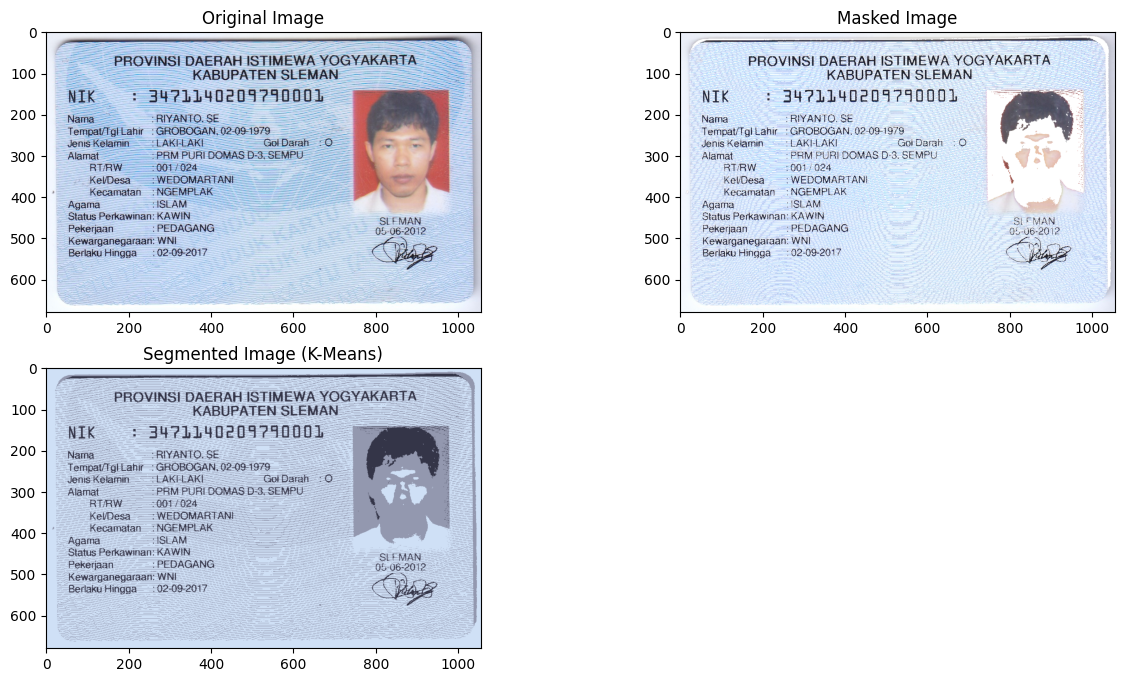

In [8]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

# Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan

Install PIP OCR

In [17]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita tunjukan objek figure kita dengan method show()

In [18]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [20]:
from pytesseract import Output
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Menambahkan kotak untuk deteksi teksi pada gambar

In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
     (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
     img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

Hasil pembacaan KTP Menjadi text

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



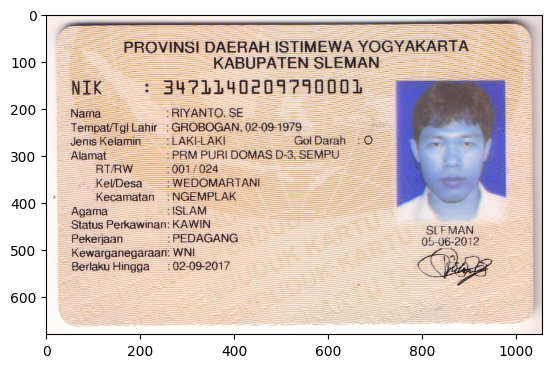

In [23]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp.png')
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

# Tugasnya adalah mengimplementasikan hasil citra yang telah diproses dengan GLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapat pada KTP

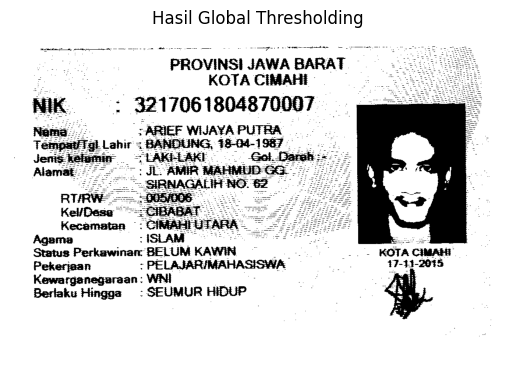

In [24]:
import cv2
from matplotlib import pyplot as plt

# Membaca gambar KTP
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp2.png', 0)  # Baca dalam mode grayscale

# Lakukan Global Thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)



# Tampilkan gambar setelah thresholding
plt.imshow(thresh, cmap='gray')
plt.title('Hasil Global Thresholding')
plt.axis('off')
plt.show()

In [25]:
import pytesseract

# Konversi hasil thresholding ke format yang bisa dibaca Tesseract (dalam bentuk string)
text = pytesseract.image_to_string(thresh)

# Tampilkan teks yang terbaca
print("Teks yang terbaca dari KTP:")
print(text)

Teks yang terbaca dari KTP:
” PROVINSI JAWA BARAT
KOTA CIMAHI

321706 1804870007

_PABIEF WIAYA PUTRA

       
   
  

Agama :

Status Perkawinan BELUM KAWIN. .
Pekerjaan : PELAJARIMAHASISWA
Kewargenegaraan: WN!

Berlaku Hingga - SEUMUR HIDUP

